# Introduction to PCA, UMAP and clustering
### Date: 25/03/24
### Author: Martin Loza

In [86]:
# Init
library("ggplot2")
library("dplyr")
library("umap")
library("patchwork")

# local variables
seed = 123

PCA is a dimensionality reduction technique used for summarizing the dat. Is a technique than can be "safely" used in other tasks as a summary of the original data.

UMAP is a dimensionality reduction technique for visualizing the data. We wouldn't like to use UMAP reducted data in other tasks other than visualization. 

In this example we will use the Iris dataset as a very simple exploration data.

In [31]:
# load the iris dataset
data <- iris
print(head(data))
print(table(data$Species))

species = data$Species
#remove the species column
data <- data[,-5]

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa

    setosa versicolor  virginica 
        50         50         50 


In [32]:
print(dim(data))
head(data)

[1] 150   4


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [33]:
# get the pca representation of the data
pca <- prcomp(data, scale = TRUE)
pca

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

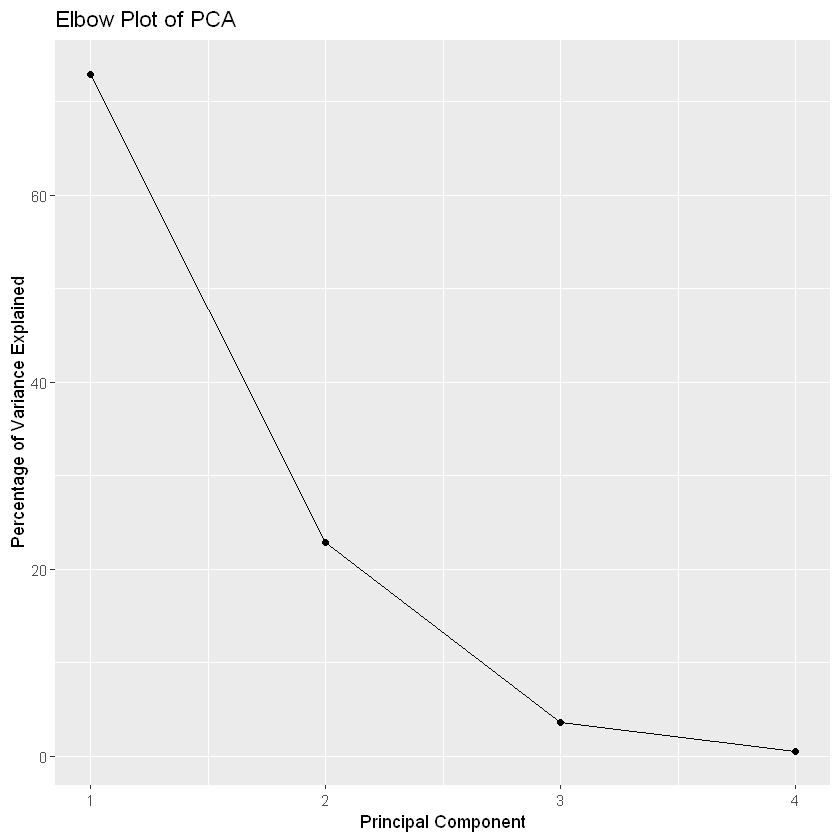

In [34]:
# check the elbow plot of the pca
pca_var <- pca$sdev^2
pca_var_perc <- pca_var / sum(pca_var) * 100

data.frame(Principal_Component = 1:length(pca_var_perc), Variance_Explained = pca_var_perc) %>%
    ggplot(aes(x = Principal_Component, y = Variance_Explained)) + 
    geom_point() + geom_line() + xlab("Principal Component") + ylab("Percentage of Variance Explained") + ggtitle("Elbow Plot of PCA")

For now, lets chose 2 dimensions

In [39]:
n_dim <- 3
pca_data <- as.data.frame(pca$x[,1:n_dim])
print(head(pca_data))
print(dim(pca_data))

        PC1        PC2         PC3
1 -2.257141 -0.4784238  0.12727962
2 -2.074013  0.6718827  0.23382552
3 -2.356335  0.3407664 -0.04405390
4 -2.291707  0.5953999 -0.09098530
5 -2.381863 -0.6446757 -0.01568565
6 -2.068701 -1.4842053 -0.02687825
[1] 150   3


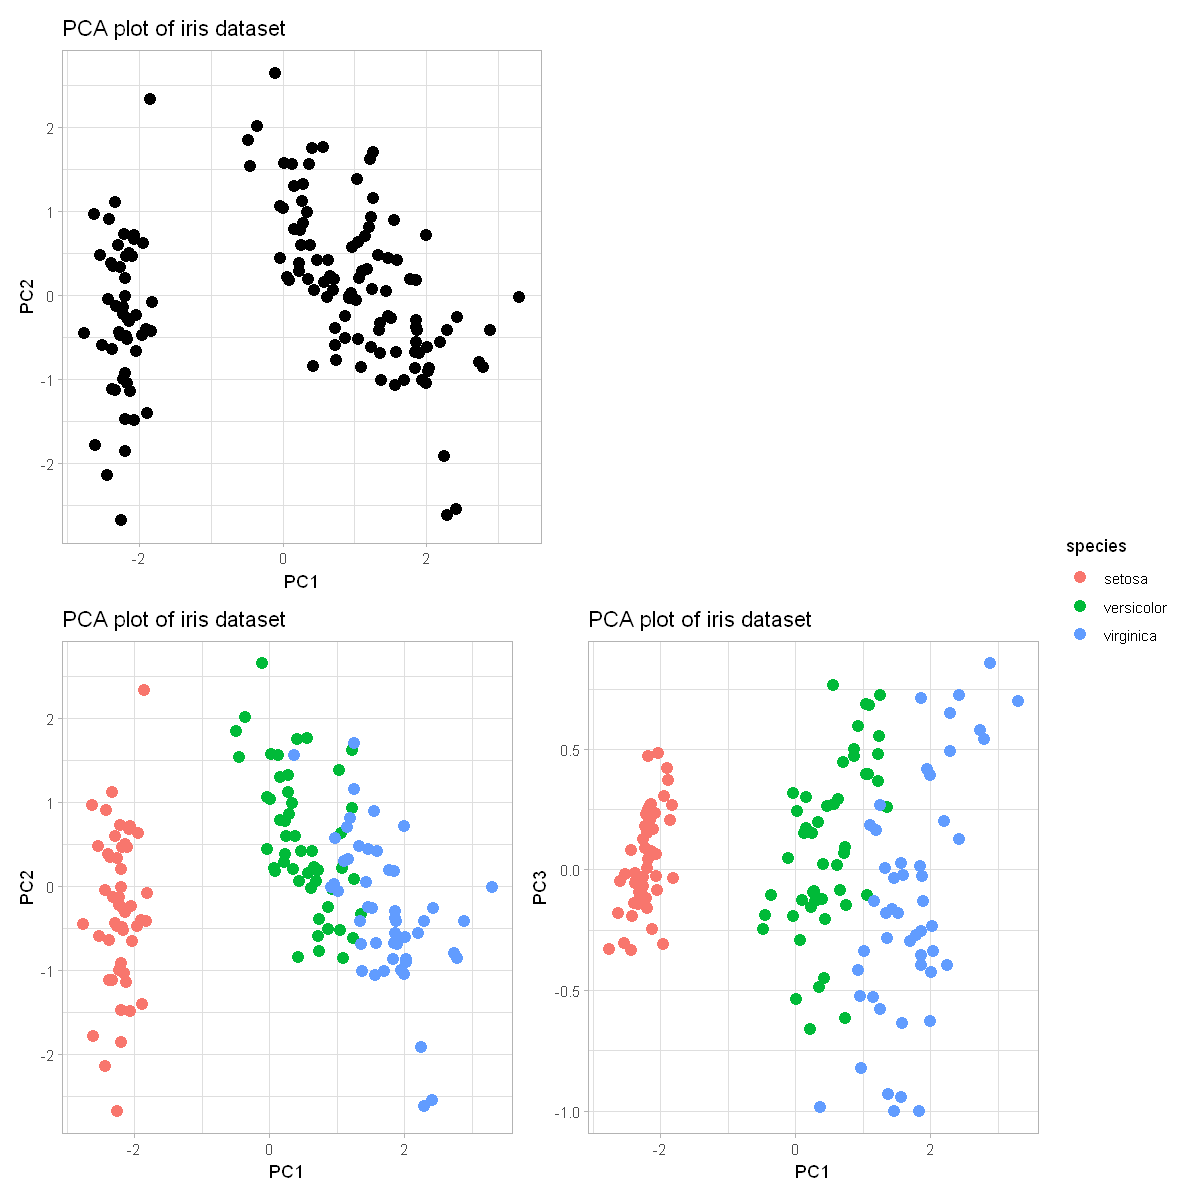

In [48]:
p1 <- pca_data %>% 
    ggplot(aes(x = PC1, y = PC2)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("PCA plot of iris dataset")

p2 <- pca_data %>%
    ggplot(aes(x = PC1, y = PC2, color = species)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("PCA plot of iris dataset") 

p3 <- pca_data %>%
    ggplot(aes(x = PC1, y = PC3, color = species)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("PCA plot of iris dataset") 

# change figure size
options(repr.plot.width=10, repr.plot.height=10)
(p1 + plot_spacer()) / (p2 + p3) + plot_layout(guides = 'collect')



We can see that PCA captures to divide versicolor and virginica... hopefully we can capture them better with UMAP

In [63]:
# get the umap representation of the data
umap_data <- umap(data, n_neighbors = 20, n_components = 2, metric = "euclidean")
umap_data <- as.data.frame(umap_data$layout)
# rename the columns
colnames(umap_data) <- c("UMAP1", "UMAP2")
print(head(umap_data))

     UMAP1     UMAP2
1 11.98272 -3.644009
2 10.89456 -1.941026
3 10.71673 -2.537731
4 10.59870 -2.361673
5 12.04122 -3.609655
6 13.33549 -3.721108


layout has the reduced space of the data

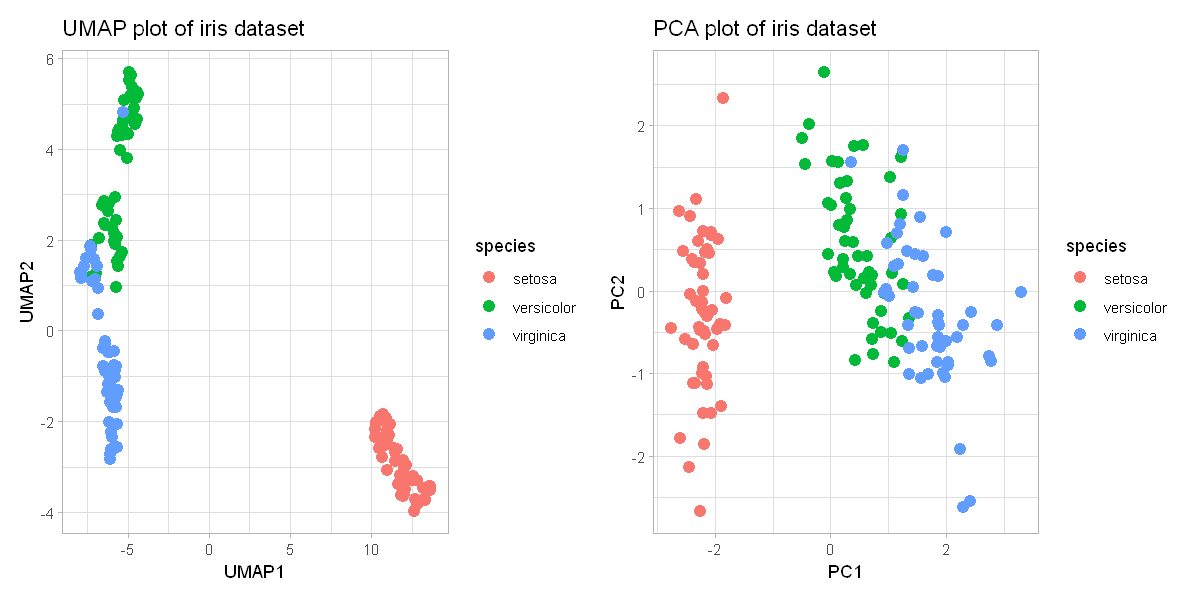

In [64]:
p_umap <- umap_data %>%
    ggplot(aes(x = UMAP1, y = UMAP2, color = species)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("UMAP plot of iris dataset")

p_pca <- pca_data %>%
    ggplot(aes(x = PC1, y = PC2, color = species)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("PCA plot of iris dataset")

#change figure size
options(repr.plot.width=10, repr.plot.height=5)
p_umap + p_pca

In [66]:
umap_pca <- umap(pca_data[,1:3], n_neighbors = 20, n_components = 2, metric = "euclidean")
# rename the columns
colnames(umap_pca$layout) <- c("UMAP1", "UMAP2")
umap_pca <- as.data.frame(umap_pca$layout)

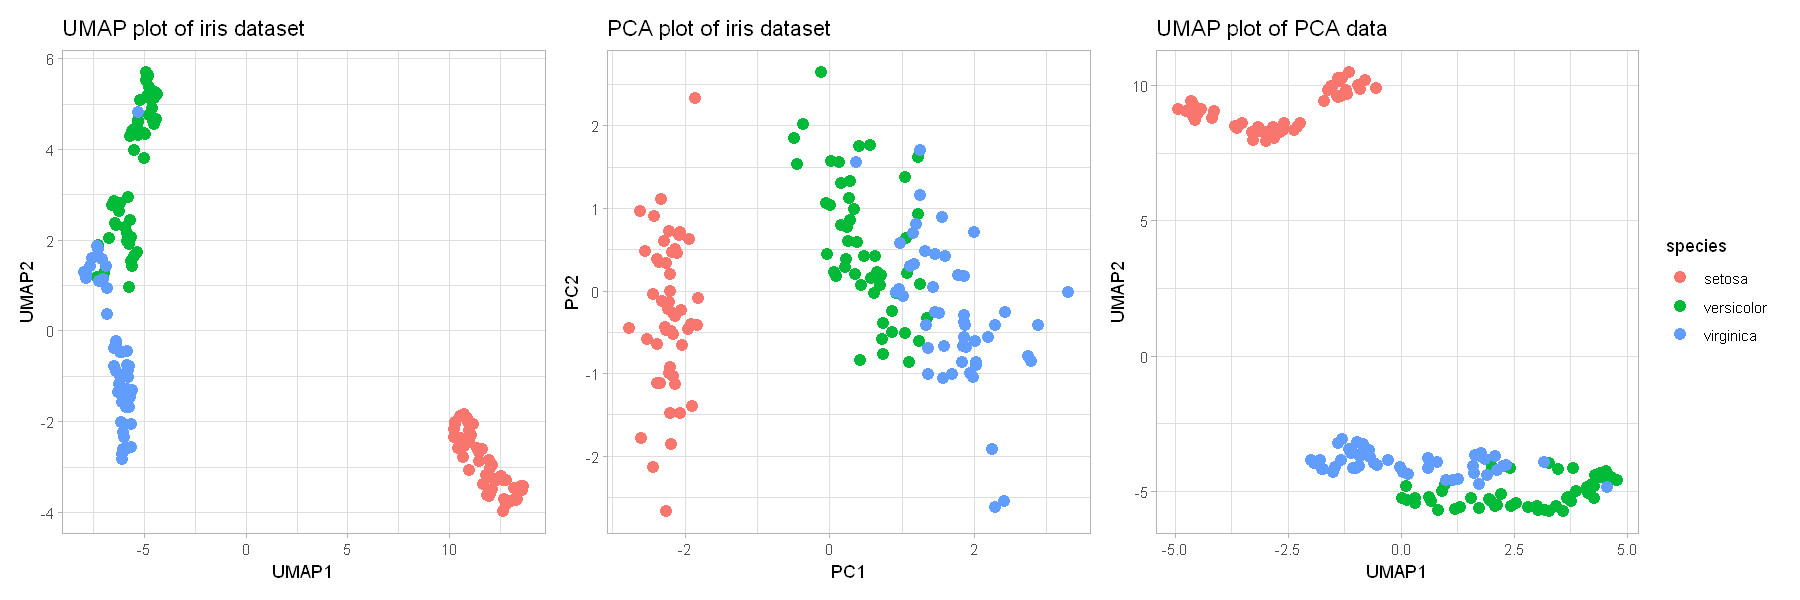

In [68]:
p_umap <- umap_data %>%
    ggplot(aes(x = UMAP1, y = UMAP2, color = species)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("UMAP plot of iris dataset")

p_pca <- pca_data %>%
    ggplot(aes(x = PC1, y = PC2, color = species)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("PCA plot of iris dataset")

p_umap_pca <- umap_pca %>%
    ggplot(aes(x = UMAP1, y = UMAP2, color = species)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("UMAP plot of PCA data")

#change figure size
options(repr.plot.width=15, repr.plot.height=5)
p_umap + p_pca + p_umap_pca + plot_layout(guides = 'collect')

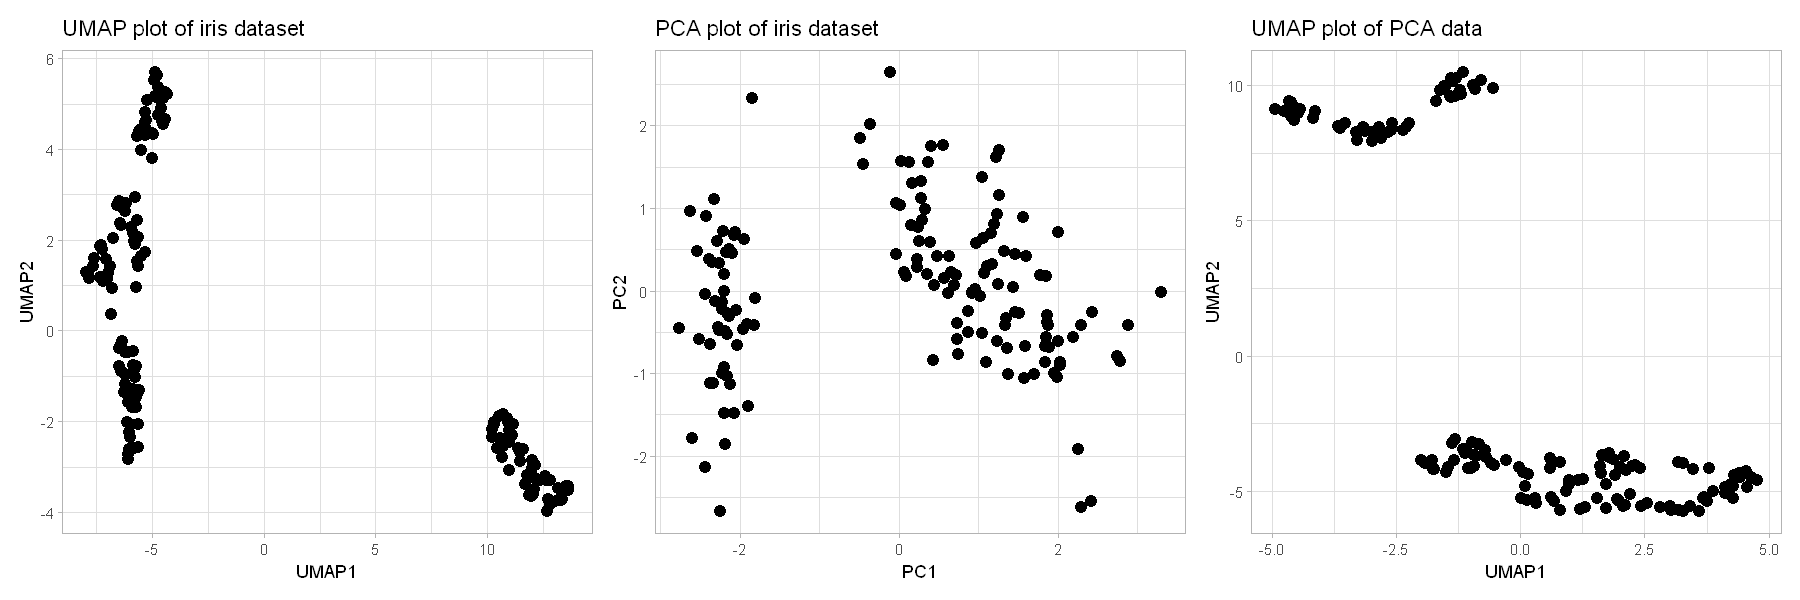

In [ ]:
p_umap <- umap_data %>%
    ggplot(aes(x = UMAP1, y = UMAP2)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("UMAP plot of iris dataset")

p_pca <- pca_data %>%
    ggplot(aes(x = PC1, y = PC2)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("PCA plot of iris dataset")

p_umap_pca <- umap_pca %>%
    ggplot(aes(x = UMAP1, y = UMAP2)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("UMAP plot of PCA data")

#change figure size
options(repr.plot.width=15, repr.plot.height=5)
p_umap + p_pca + p_umap_pca + plot_layout(guides = 'collect')

Something clear is that there are at least two groups

We will prefer to use PCA representation for this

In [ ]:
k = 3
set.seed()
# use kmeans to cluster the data 
kmeans_data <- kmeans(pca_data, centers = k)
cl <- kmeans_data$cluster
cl <- factor(cl)
table(cl)

cl
 1  2  3 
50 53 47 

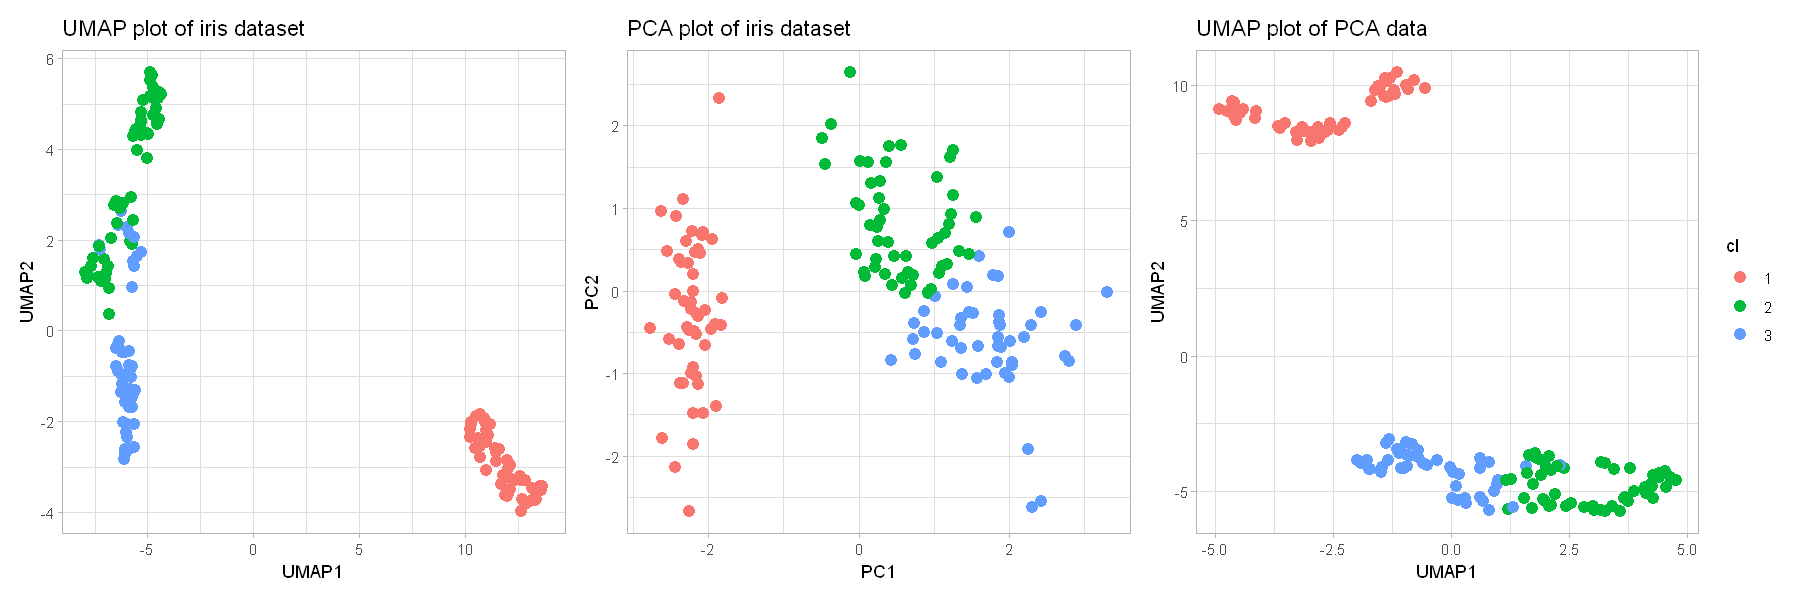

In [84]:
p_umap <- umap_data %>%
    ggplot(aes(x = UMAP1, y = UMAP2, color = cl)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("UMAP plot of iris dataset")

p_pca <- pca_data %>%
    ggplot(aes(x = PC1, y = PC2, color = cl)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("PCA plot of iris dataset")

p_umap_pca <- umap_pca %>%
    ggplot(aes(x = UMAP1, y = UMAP2, color = cl)) + 
    geom_point(size = 3) + 
    theme_light() +
    ggtitle("UMAP plot of PCA data")

#change figure size
options(repr.plot.width=15, repr.plot.height=5)
p_umap + p_pca + p_umap_pca + plot_layout(guides = 'collect')